In [9]:
using ArraySignalProcessing

# array we want to compare the nested one with
pa = IsotropicArray(-6e-2, -2e-2, 2e-2, 6e-2)

# unecessarily deeply nested array - just for demonstration
base_pa1 = IsotropicArray(-2e-2, 2e-2)
base_pa2 = IsotropicArray(0)
nested_pa = NestedArray(IsotropicArray(-4e-2, 4e-2), [base_pa1, NestedArray(IsotropicArray(-2e-2, 2e-2), [base_pa2, base_pa2])])
weights = dsb_weights(nested_pa, deg2rad(110), 3.75e9)

faxis = LinRange(3.7e9, 3.8e9, 1024)
# notice how both steering vectors are identical
println(weights)
println(dsb_weights(pa, deg2rad(110), 3.75e9))

ComplexF64[-0.010509753549116777 + 0.24977899247201876im; 0.21473299713986604 + 0.12802241967456432im; 0.21473299713986604 - 0.12802241967456432im; -0.010509753549116777 - 0.24977899247201876im;;]
ComplexF64[-0.01050975354911672 + 0.24977899247201882im; 0.21473299713986604 + 0.12802241967456432im; 0.21473299713986604 - 0.12802241967456432im; -0.01050975354911672 - 0.24977899247201882im;;]


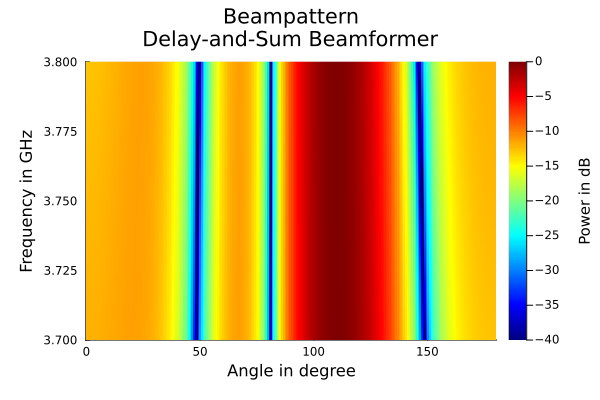

In [10]:
ϕaxis = LinRange(0, 180, 256)
A = steer.(Ref(nested_pa), Ref(deg2rad.(ϕaxis)), faxis)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")

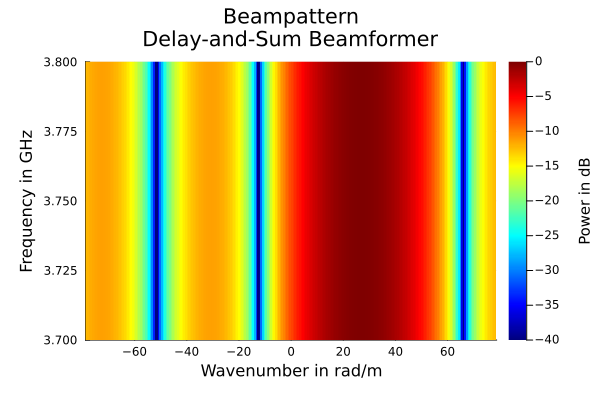

In [11]:
kxaxis = LinRange(-π/4e-2, π/4e-2, 256) # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
A = steer.(Ref(nested_pa), Ref(kxaxis), faxis; coords=:WaveVec)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(kxaxis, faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Wavenumber in rad/m")
ylabel!("Frequency in GHz")

Note how the beampattern is not pinched/stretched for changing frequencies when plotted over a wavenumber axis. 

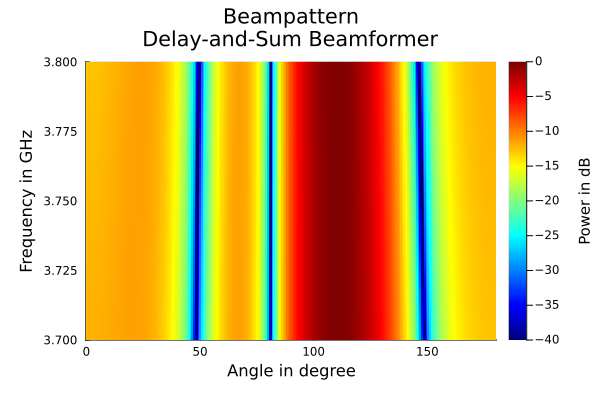

In [13]:
# we may even use CUDA.jl
using CUDA

base_pa1 = IsotropicArray(cu([-2e-2, 2e-2]))
base_pa2 = IsotropicArray(cu([0]))
nested_pa = NestedArray(IsotropicArray(cu([-4e-2, 4e-2])), [base_pa1, NestedArray(IsotropicArray(cu([-2e-2, 2e-2])), [base_pa2, base_pa2])])
weights = dsb_weights(nested_pa, cu([deg2rad(110)]), 3.75e9)

faxis = LinRange(3.7e9, 3.8e9, 1024)

ϕaxis = LinRange(0, 180, 256)
A = steer.(Ref(nested_pa), Ref(deg2rad.(cu(collect(ϕaxis)))), faxis)
W = reduce(vcat, Ref(weights') .* A)
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,faxis/1e9, Array(WdB), cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")